In [0]:
# Manipulação de dados
import pandas as pd
import numpy as np
import random

# Aprendizado de Máquina
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Visualização
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Regressão em senoides de múltiplas frequências

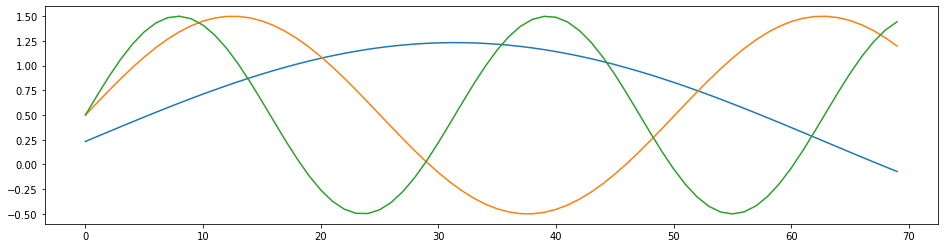

In [0]:
janela = 60
horizonte = 10
num_samples = 200

sample_size = janela+horizonte
xtime = np.arange(0, sample_size)

X = [ np.sin(i * xtime) for i in  np.linspace(0.05, 0.2, num_samples) ]

plt.figure(figsize=(16,4))
for i in [0, num_samples//2, -1]:  
  x = X[i]
  x = x - min(x) / (max(x) - min(x))
  
  plt.plot(x)

plt.show()

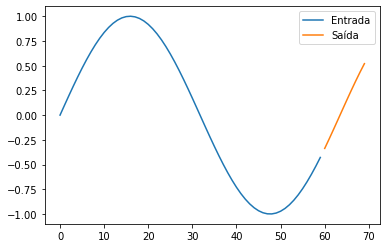

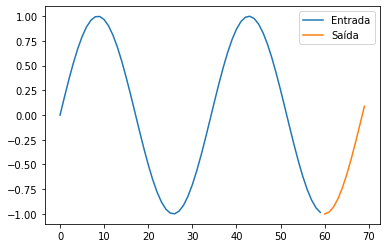

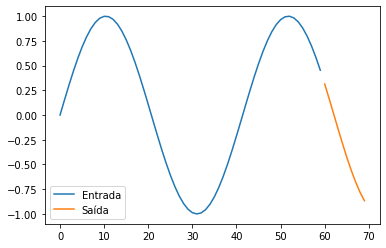

In [0]:
X = np.asarray(X)
data = X[:, :janela]
label = X[:, janela:]

idx = np.random.permutation(len(data))

data_train  = data[idx[:int(0.8 * len(data))]]
label_train = label[idx[:int(0.8 * len(data))]]

data_test  = data[idx[int(0.8 * len(data)):]]
label_test = label[idx[int(0.8 * len(data)):]]

for i in range(3):
  k = np.random.choice(np.arange(len(data_test)))
  plt.figure()
  plt.plot(range(janela), data_test[k], label='Entrada')
  plt.plot(range(janela, janela+horizonte), label_test[k], label='Saída')
  plt.legend()
  plt.show()

## Sklearn Linear Regression

In [0]:
regress = LinearRegression() #criando
regress.fit(data_train, label_train) #treinando
ypred = regress.predict(data_test)  #usando

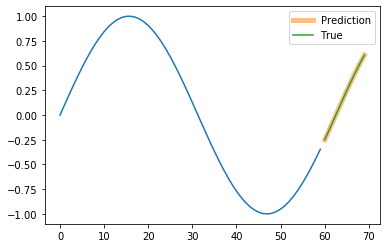

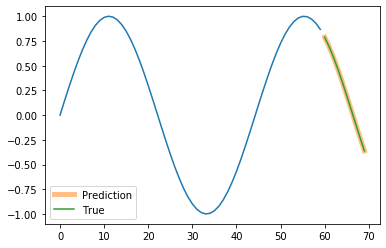

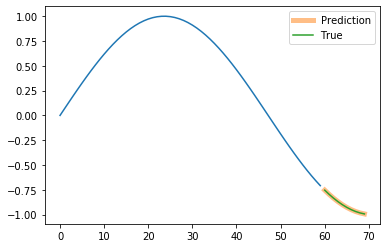

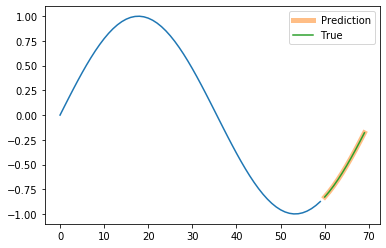

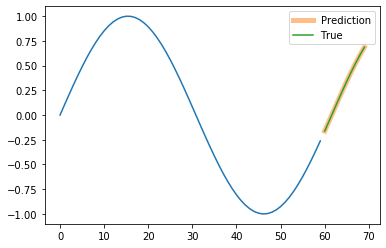

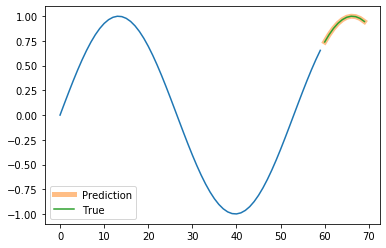

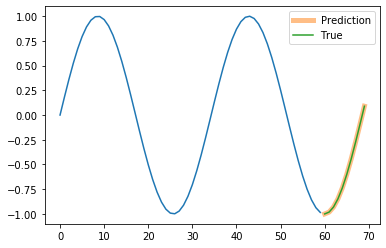

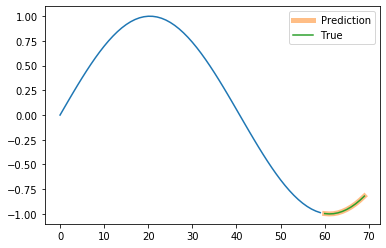

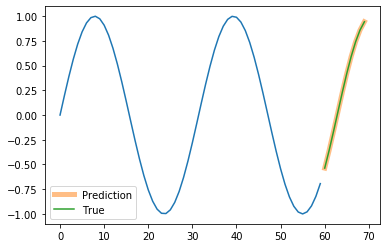

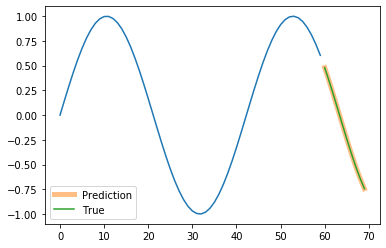

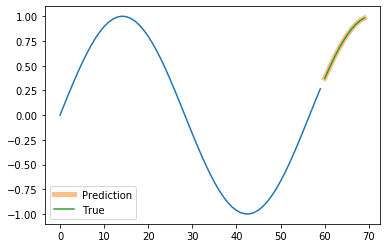

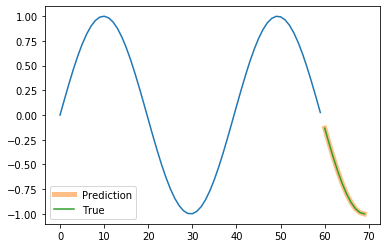

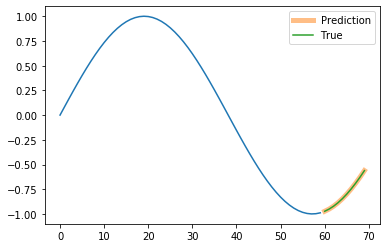

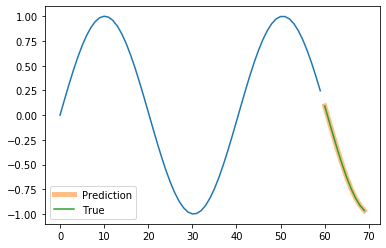

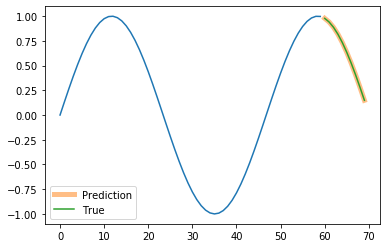

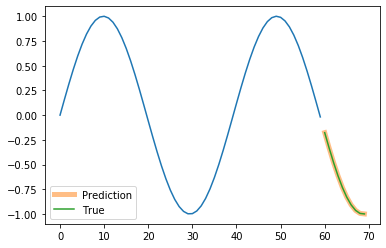

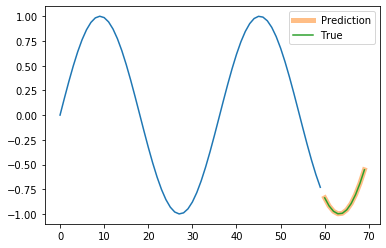

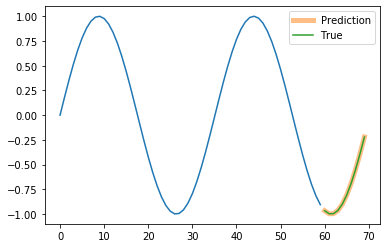

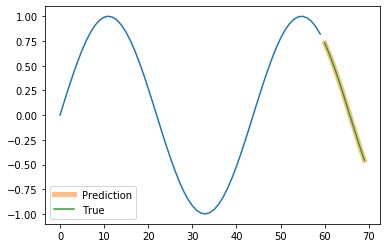

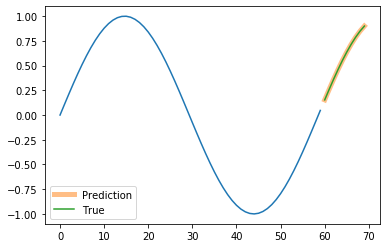

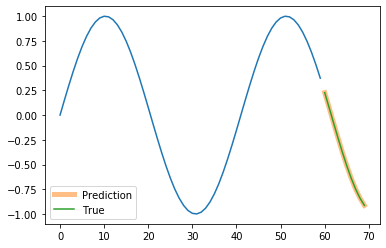

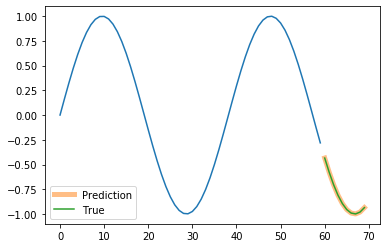

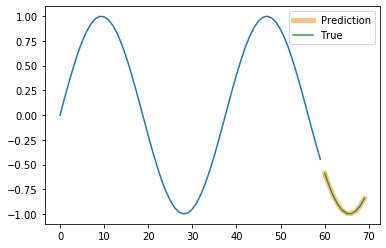

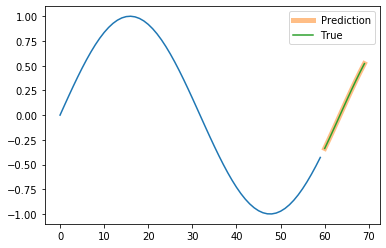

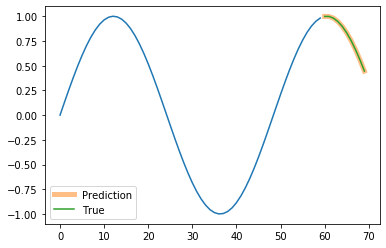

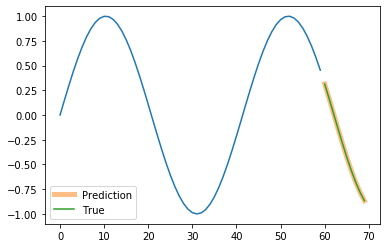

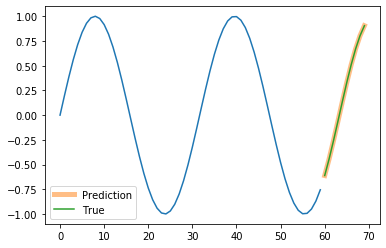

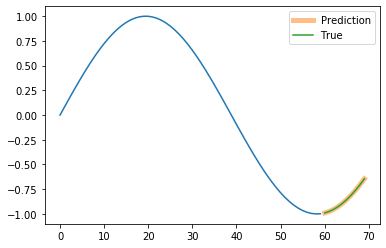

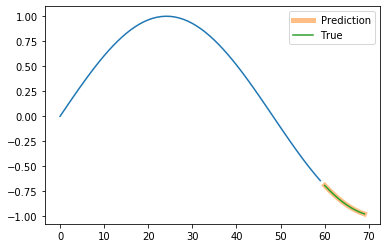

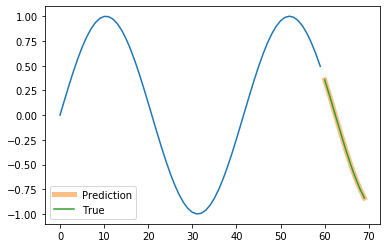

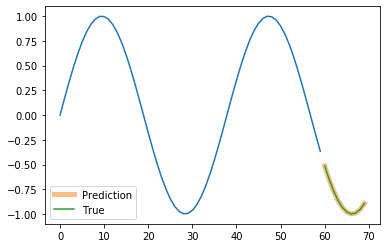

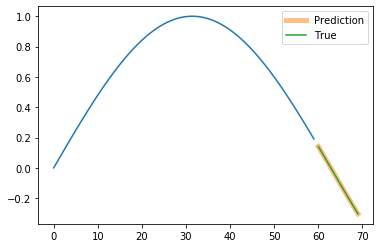

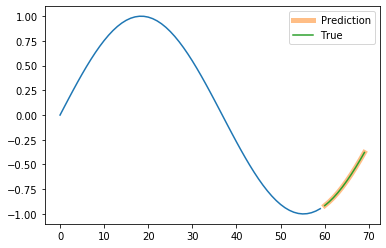

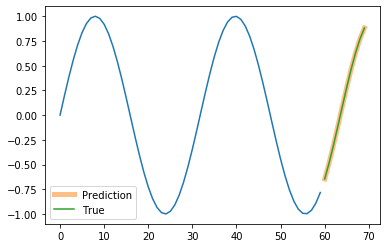

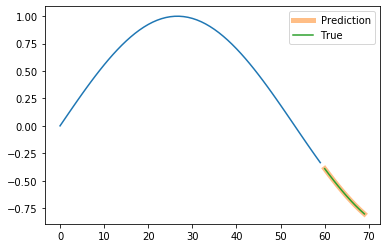

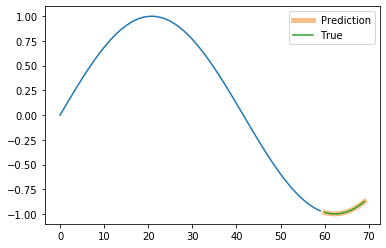

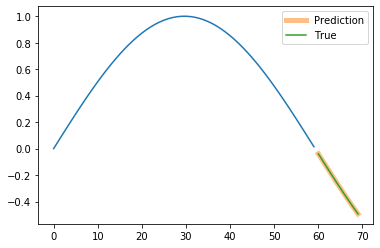

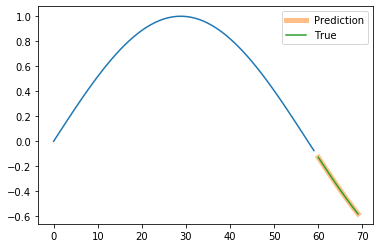

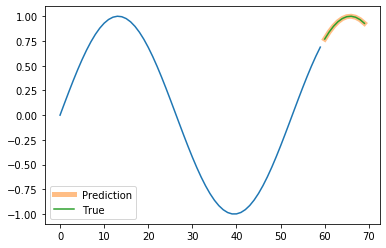

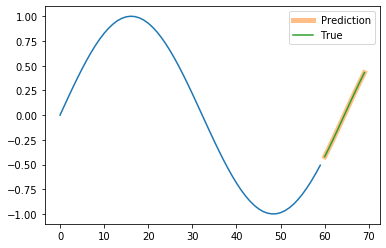

In [0]:
for k in range(len(data_test)):
  plt.figure()
  plt.plot(range(janela), data_test[k])
  plt.plot(range(janela, janela+horizonte), ypred[k], linewidth=5, alpha=0.5, label='Prediction')
  plt.plot(range(janela, janela+horizonte), label_test[k], label='True')
  plt.legend()
  plt.show()

## Regressão para prever o comportamento do dólar

In [2]:
data_df = pd.read_csv('USD_BRL.csv')
data_df

,Date,Price,Open,High,Low,Change %
0,"Mar 13, 2020",4.7243,4.7092,4.7411,4.6809,-1.40%
1,"Mar 12, 2020",4.7916,4.8154,5.0284,4.7496,-0.49%
2,"Mar 11, 2020",4.8152,4.6406,4.8289,4.6406,3.69%
3,"Mar 10, 2020",4.6439,4.6741,4.6881,4.6352,-1.71%
4,"Mar 09, 2020",4.7246,4.7601,4.7954,4.7064,2.10%
...,...,...,...,...,...,...
519,"Mar 19, 2018",3.2862,3.2790,3.2969,3.2790,0.16%
520,"Mar 16, 2018",3.2811,3.2862,3.2997,3.2719,-0.16%
521,"Mar 15, 2018",3.2862,3.2626,3.2980,3.2614,0.78%
522,"Mar 14, 2018",3.2607,3.2614,3.2679,3.2466,0.00%


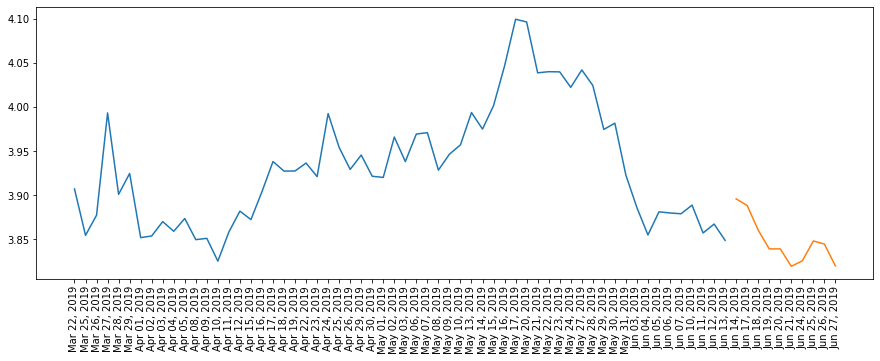

In [0]:
## Carregando dados de treino e validação
usd_price  = data_df['Price'][::-1].to_numpy()
train_data = usd_price[:-30] #removendo o último mês

dates = data_df['Date'][::-1].to_numpy()
dates = dates[:-30]

X_train, Y_train, dates_train = [], [], []
for i in range(num_samples):
  start = np.random.randint(0, len(train_data)-janela-horizonte)
  X_train.append(train_data[start:start+janela])
  Y_train.append(train_data[start+janela:start+janela+horizonte])
  dates_train.append(dates[start:start+janela+horizonte])

X_val = X_train[-5:]
Y_val = Y_train[-5:] 
dates_val = dates_train[-5:]

X_train = X_train[:-5]
Y_train = Y_train[:-5]

## Plot
plt.figure(figsize=(15, 5))
plt.plot(range(janela), X_train[2])
plt.plot(range(janela, janela+horizonte), Y_train[2])
plt.xticks(range(janela+horizonte), dates_train[2], rotation=90)
plt.show()

## Sklearn Polynomial Regression

In [0]:
polynomialFeatures = PolynomialFeatures(degree=2)
X_poly = polynomialFeatures.fit_transform(X_train)

regress = LinearRegression() #criando
regress.fit(X_poly, Y_train) #treinando
ypred = regress.predict(X_poly) #usando

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

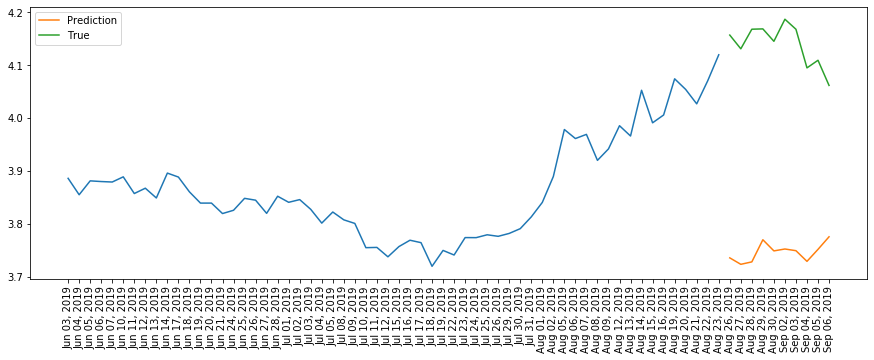

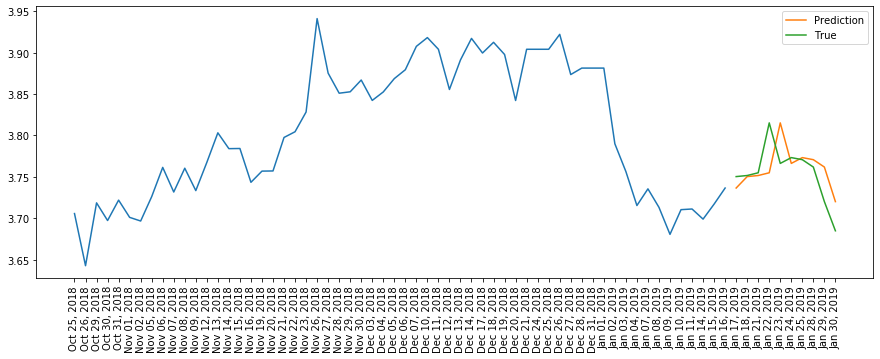

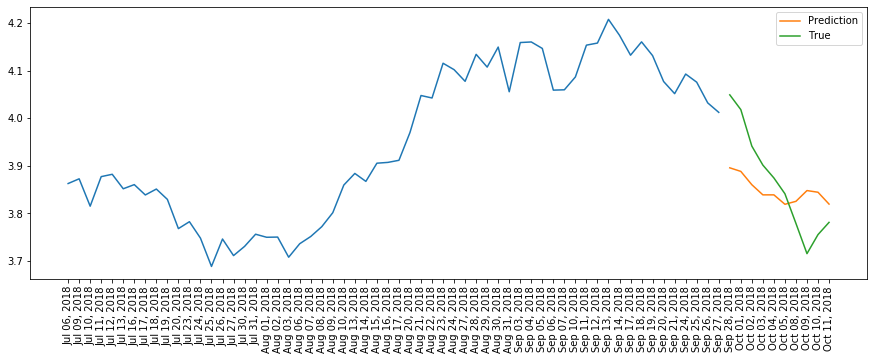

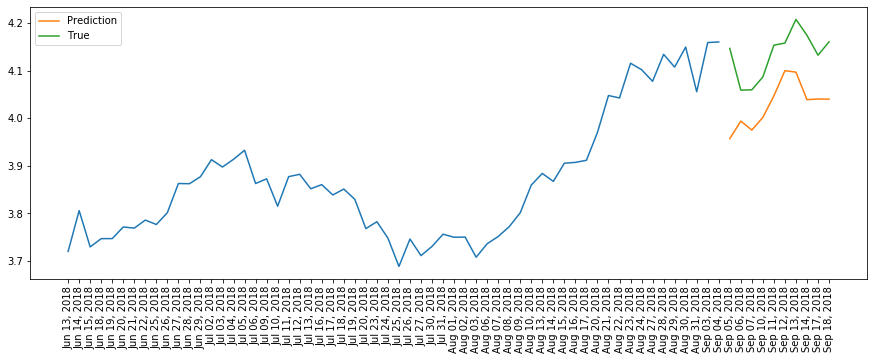

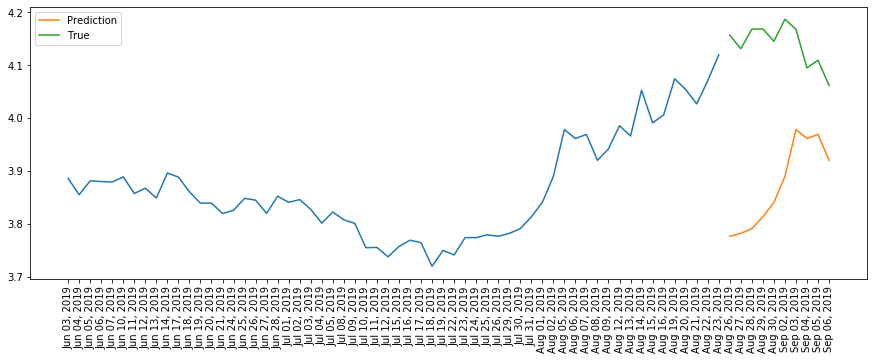

In [0]:
for k, sample in enumerate(X_val):
  plt.figure(figsize=(15, 5))
  plt.plot(range(janela), sample)
  plt.plot(range(janela, janela+horizonte), ypred[k], label='Prediction')
  plt.plot(range(janela, janela+horizonte), Y_val[k], label='True')
  plt.legend()
  plt.xticks(range(janela+horizonte), dates_val[k], rotation=90)
  plt.show()

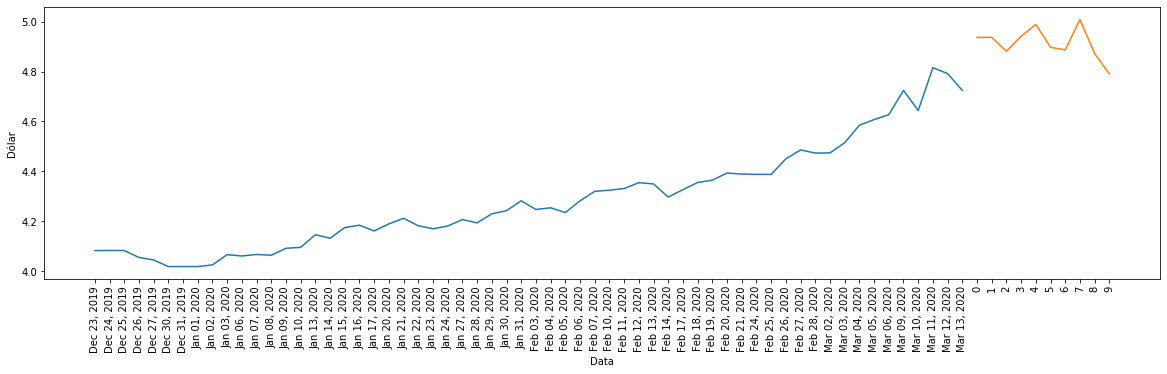

In [0]:
test_data  = data_df['Price'][::-1].to_numpy()
test_data = test_data[-janela:]

dates = data_df['Date'][::-1].to_numpy()
dates = dates[-janela:]

steps = 1
plt.figure(figsize=(20, 5))
plt.plot(range(janela), test_data)

for i in range(steps): 
  XPoly = polynomialFeatures.transform([test_data])
  ypred = regress.predict(XPoly)

  plt.plot(range(janela + i*horizonte, janela+ (i+1)*horizonte), ypred[0], label='Prediction')
  
  xticks = np.append(dates, [str(c) for c in range(horizonte*(i+1))] )
  plt.xticks(range(janela+(i+1)*horizonte), xticks, rotation=90)

  test_data = np.append(test_data[horizonte:], ypred)

  plt.ylabel('Dólar')
  plt.xlabel('Data')